In [169]:
import pandas
# load the dataset
header_list = ["main"]

dataset = pandas.read_csv('case_100_statement.txt',names=header_list, delimiter = '\t')
dataset.head()

,main
0,"P. Venkatarama Reddi, J."
1,1. The opinion recorded by the Kerala High Cou...
2,Whether on the facts and in the circumstances ...
3,The High Court accepted the view of the Tribun...
4,2. The facts in brief are: The respondent-asse...


In [170]:

#Fetch wordcount for each abstract
dataset['word_count'] = dataset['main'].apply(lambda x: len(str(x).split(" ")))
dataset[['main','word_count']].head()

##Descriptive statistics of word counts
dataset.word_count.describe()

#Identify common words
freq = pandas.Series(' '.join(dataset['main']).split()).value_counts()[:20]
freq

#Identify uncommon words
freq1 =  pandas.Series(' '.join(dataset 
         ['main']).split()).value_counts()[-20:]
freq1


whatever     1
We           1
Further,     1
2.           1
steps        1
Despite      1
favour       1
P.           1
1980-81      1
his          1
noticed      1
so           1
officer      1
1980-81,     1
exported     1
1997         1
back         1
write-off    1
sales-tax    1
accepted     1
dtype: int64

In [173]:

##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

text = open('case_100_statement.txt', 'r').read()

In [174]:
corpus = []
for i in range(0, 3847):
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [175]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=1.0,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)


[Text(0, 0, 'tax'),
 Text(1, 0, 'year'),
 Text(2, 0, 'assessee'),
 Text(3, 0, 'tribunal'),
 Text(4, 0, 'liability'),
 Text(5, 0, 'case'),
 Text(6, 0, 'court'),
 Text(7, 0, 'income'),
 Text(8, 0, 'made'),
 Text(9, 0, 'purchase'),
 Text(10, 0, 'high'),
 Text(11, 0, 'appeal'),
 Text(12, 0, 'assessment'),
 Text(13, 0, 'section'),
 Text(14, 0, 'fact'),
 Text(15, 0, 'view'),
 Text(16, 0, 'account'),
 Text(17, 0, 'provision'),
 Text(18, 0, 'sc'),
 Text(19, 0, 'question')]

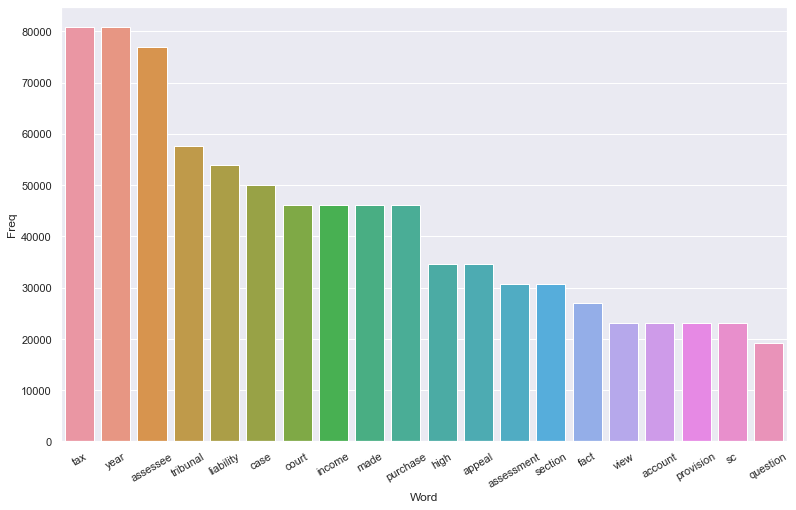

In [176]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

               Bi-gram   Freq
0         purchase tax  42317
1           high court  34623
2      assessment year  26929
3           income tax  23082
4       provision made  19235
5           neroth oil  19235
6             oil mill  19235
7            mill case  19235
8          year ending  15388
9     towards purchase  15388
10  liability assessee  15388
11             manu sc  15388
12       case tribunal  11541
13       previous year  11541
14       tax liability  11541
15          view taken  11541
16            sale tax  11541
17      tax department  11541
18         kerala high   7694
19        appeal filed   7694


[Text(0, 0, 'purchase tax'),
 Text(1, 0, 'high court'),
 Text(2, 0, 'assessment year'),
 Text(3, 0, 'income tax'),
 Text(4, 0, 'provision made'),
 Text(5, 0, 'neroth oil'),
 Text(6, 0, 'oil mill'),
 Text(7, 0, 'mill case'),
 Text(8, 0, 'year ending'),
 Text(9, 0, 'towards purchase'),
 Text(10, 0, 'liability assessee'),
 Text(11, 0, 'manu sc'),
 Text(12, 0, 'case tribunal'),
 Text(13, 0, 'previous year'),
 Text(14, 0, 'tax liability'),
 Text(15, 0, 'view taken'),
 Text(16, 0, 'sale tax'),
 Text(17, 0, 'tax department'),
 Text(18, 0, 'kerala high'),
 Text(19, 0, 'appeal filed')]

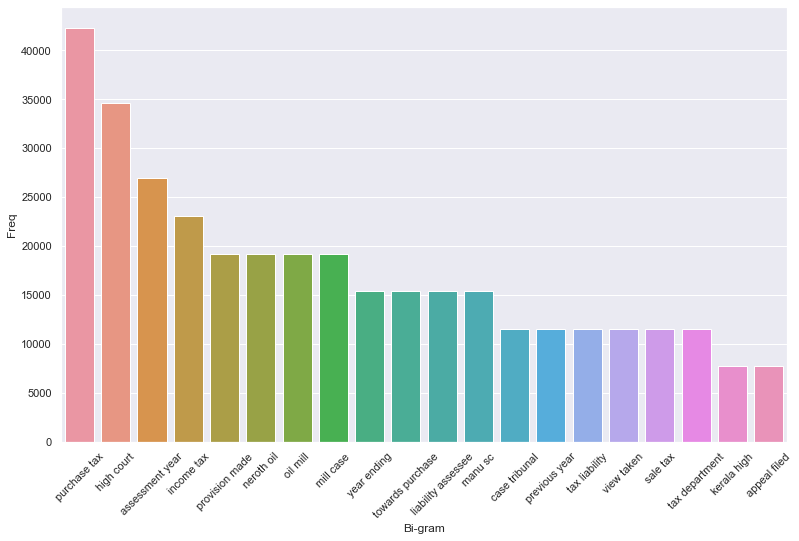

In [177]:

#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

In [178]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

                      Tri-gram   Freq
0              neroth oil mill  19235
1                oil mill case  19235
2         towards purchase tax  15388
3       purchase tax liability  11541
4            kerala high court   7694
5      commissioner income tax   7694
6           section income tax   7694
7               income tax act   7694
8         previous year ending   7694
9       provision made earlier   7694
10        income previous year   7694
11  pertaining assessment year   7694
12         judgment neroth oil   7694
13         sale tax department   7694
14      tax liability assessee   7694
15      unilateral action part   7694
16        action part assessee   7694
17   respect trading liability   7694
18                 ltd manu sc   7694
19                manu sc manu   7694


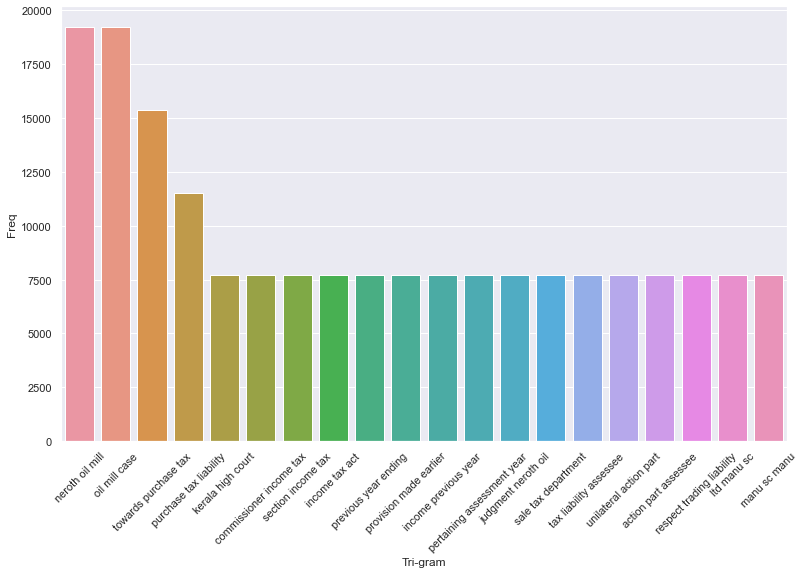

In [179]:
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[532]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [198]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 

print("\nKeywords:")
for k in keywords:
    print(k)


Keywords:
year
tax
assessee
tribunal
liability


In [199]:
list1=[]
for k in keywords:
    list1.append(k)

In [196]:
file = open('tags.txt', 'w+', newline ='')
  
file.write(k)